## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt
import glob
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from tensorflow import keras
from scipy.signal import savgol_filter

## Load grid data (true values)

In [44]:
# Grid data for real values
grid = pd.read_pickle("../data_pickles/grid50_50_all.pkl")
frac = 0.125 # How to divide grid
train_split = 0.8

grid = grid.iloc[:int(grid.size*frac)]
train_size = int(len(grid)*train_split)
test_size = len(grid) - train_size
test = grid.iloc[train_size:len(grid)]

## Load prediction data

In [45]:
arima_pred = np.load("../results/ARIMA/ARIMA_12_50_50_012.npy")

LSTM_pred = np.load("../results/LSTM/predictions/LSTM_12_50_50.npy")
LSTM_history = np.load("../results/LSTM/training/LSTM_HISTORY_12_50_50.npy",allow_pickle='TRUE').item()

SLSTM_pred = np.load("../results/SPATIOLSTM/predictions/SPATIOLSTM_12_50_50_1.npy")
SLSTM_history = np.load("../results/SPATIOLSTM/training/SPATIOLSTM_HISTORY_12_50_50_1.npy",allow_pickle='TRUE').item()

SLSTM2_pred = np.load("../results/SPATIOLSTM2/predictions/SPATIOLSTM2_12_50_50_9.npy")
SLSTM2_history = np.load("../results/SPATIOLSTM2/training/SPATIOLSTM2_HISTORY_12_50_50_9.npy",allow_pickle='TRUE').item()

In [42]:
print(test.size)
print(arima_pred.size)
print(LSTM_pred.size)
print(SLSTM_pred.size)
print(SLSTM2_pred.size)

224
224
212
218
218


## Plot inter-model comparisons

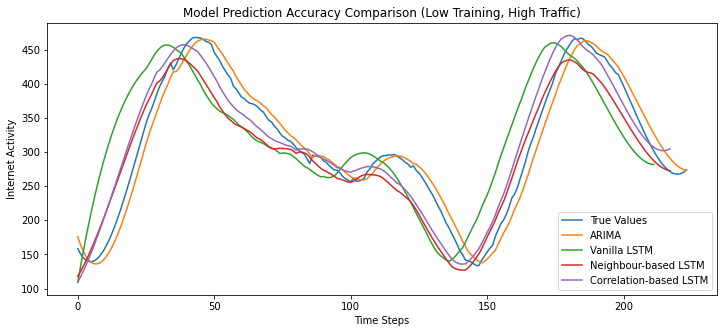

In [46]:
plt.figure(figsize=(12,5))

plt.title('Model Prediction Accuracy Comparison (Low Training, High Traffic)')

# Used to change the fraction of test dataset to plot
plot_frac = 1

test_filt = savgol_filter(test["InternetActivity"].values[:int(test_size*plot_frac)], 51, 3)
ARIMA_filt = savgol_filter(arima_pred[:int(test_size*plot_frac)], 51, 3)
LSTM_filt = savgol_filter(LSTM_pred[:int(test_size*plot_frac)], 51, 3)
SLSTM_filt = savgol_filter(SLSTM_pred[:int(test_size*plot_frac)], 51, 3)
SLSTM2_filt = savgol_filter(SLSTM2_pred[:int(test_size*plot_frac)], 51, 3)

plt.plot(test_filt, label='True Values')
plt.plot(ARIMA_filt, label='ARIMA')
plt.plot(LSTM_filt, label='Vanilla LSTM')
plt.plot(SLSTM_filt, label='Neighbour-based LSTM')
plt.plot(SLSTM2_filt, label='Correlation-based LSTM')

#plt.plot(test["InternetActivity"].values[:int(test_size*plot_frac)], label='True Values')
#plt.plot(arima_pred[:int(test_size*plot_frac)], label='ARIMA')
#plt.plot(LSTM_pred[:int(test_size*plot_frac)], label='Vanilla LSTM')
#plt.plot(SLSTM_pred[:int(test_size*plot_frac)], label='Neighbour-based LSTM')
#plt.plot(SLSTM2_pred[:int(test_size*plot_frac)], label='Correlation-based LSTM')

plt.xlabel('Time Steps')
plt.ylabel('Internet Activity')

plt.legend()

plt.savefig('../Report/Results/ACC_12_50_50.png')

plt.show()

In [ ]:
labels = ['ARIMA', 'Vanilla LSTM', 'Neighbour-based LSTM', 'Correlation-based LSTM']
values = [
    0.8901,
    0.9057,
    0.8819,
    0.9133]

plt.figure(figsize=(10,3), dpi=100)

bars = plt.bar(labels, values)

#patterns = ['/', 'O', '*']
#for bar in bars:
#    bar.set_hatch(patterns.pop(0))

#plt.savefig('barchart.png', dpi=300)

plt.show()